# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the 
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [4]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo = pd.read_csv(url, sep = '\t')

### Step 4. See the first 10 entries

In [5]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

Counter({'Chicken Bowl': 726, 'Chicken Burrito': 553, 'Chips and Guacamole': 479, 'Steak Burrito': 368, 'Canned Soft Drink': 301, 'Chips': 211, 'Steak Bowl': 211, 'Bottled Water': 162, 'Chicken Soft Tacos': 115, 'Chips and Fresh Tomato Salsa': 110, 'Chicken Salad Bowl': 110, 'Canned Soda': 104, 'Side of Chips': 101, 'Veggie Burrito': 95, 'Barbacoa Burrito': 91, 'Veggie Bowl': 85, 'Carnitas Bowl': 68, 'Barbacoa Bowl': 66, 'Carnitas Burrito': 59, 'Steak Soft Tacos': 55, '6 Pack Soft Drink': 54, 'Chips and Tomatillo Red Chili Salsa': 48, 'Chicken Crispy Tacos': 47, 'Chips and Tomatillo Green Chili Salsa': 43, 'Carnitas Soft Tacos': 40, 'Steak Crispy Tacos': 35, 'Chips and Tomatillo-Green Chili Salsa': 31, 'Steak Salad Bowl': 29, 'Nantucket Nectar': 27, 'Barbacoa Soft Tacos': 25, 'Chips and Roasted Chili Corn Salsa': 22, 'Izze': 20, 'Chips and Tomatillo-Red Chili Salsa': 20, 'Veggie Salad Bowl': 18, 'Chips and Roasted Chili-Corn Salsa': 18, 'Barbacoa Crispy Tacos': 11, 'Barbacoa Salad Bowl

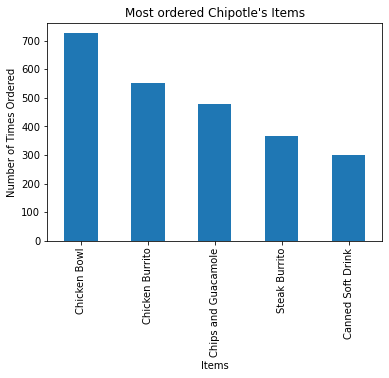

In [9]:
# get the Series of the names
x = chipo.item_name

# use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = Counter(x)
print(letter_counts)

# convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(letter_counts, orient='index')
print(df.head())
# sort the values from the top to the least value and slice the first 5 items
df = df[0].sort_values(ascending = False)[0:5]

# create the plot
df.plot(kind='bar')

# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

# show the plot
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

(0, 36.7178857951459)

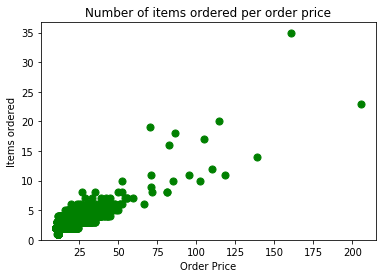

In [5]:
# create a list of prices
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price] # strip the dollar sign and trailing space

# then groupby the orders and sum
orders = chipo.groupby('order_id').sum()

# creates the scatterplot
# plt.scatter(orders.quantity, orders.item_price, s = 50, c = 'green')
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

### BONUS: Create a question and a graph to answer your own question.